# Part 2

#1 Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
#Pandas & Visual Library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/brandeefairnot/Library/CloudStorage/OneDrive-Personal/Documents/Instacart Basket Analysis/'

In [3]:
#import file
df_fin = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

In [7]:
df_fin

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Mean_Spending,order_freq_flag,Customer_Frequency,First Name,Last Name,State,Age,Dependents,Family_Status,Income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,6.367797,20.5,Regular customer,Linda,Nguyen,Alabama,31,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,6.367797,20.5,Regular customer,Linda,Nguyen,Alabama,31,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,6.367797,20.5,Regular customer,Linda,Nguyen,Alabama,31,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,6.367797,20.5,Regular customer,Linda,Nguyen,Alabama,31,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,6.367797,20.5,Regular customer,Linda,Nguyen,Alabama,31,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,prior,26,4,23,5.0,19675,1,1,...,10.700000,7.0,Frequent customer,Gerald,Yates,Hawaii,25,0,single,53755
32404855,484769,66343,prior,1,6,11,NaN,47210,1,0,...,8.100000,30.0,Regular customer,Jacqueline,Arroyo,Tennessee,22,3,married,46151
32404856,1561557,66343,prior,2,1,11,30.0,47210,1,1,...,8.100000,30.0,Regular customer,Jacqueline,Arroyo,Tennessee,22,3,married,46151
32404857,276317,66343,prior,3,6,15,19.0,47210,1,1,...,8.100000,30.0,Regular customer,Jacqueline,Arroyo,Tennessee,22,3,married,46151


In [5]:
#3 Create a histogram of the “order_hour_of_day” column.

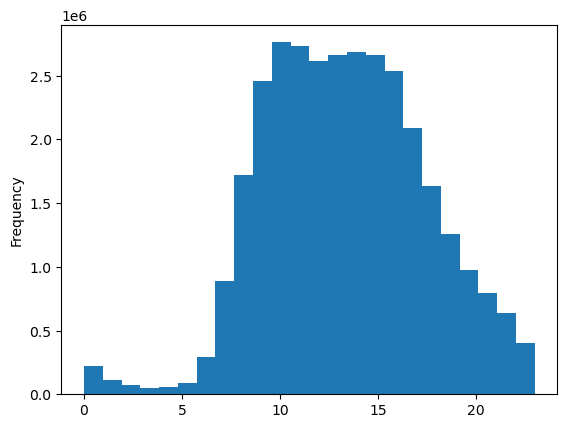

In [23]:
hist = df_fin['order_hour_of_day'].plot.hist(bins = 24)

This histogram displays the hours of the day on the x-axis. It's evident that between 11-2pm Instacart users are more prone to use their services. 

In [24]:
#export histogram chart
hist.figure.savefig(os.path.join(path, '04 Analysis','hist_4.9_Pt2 Task.png'))

#4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

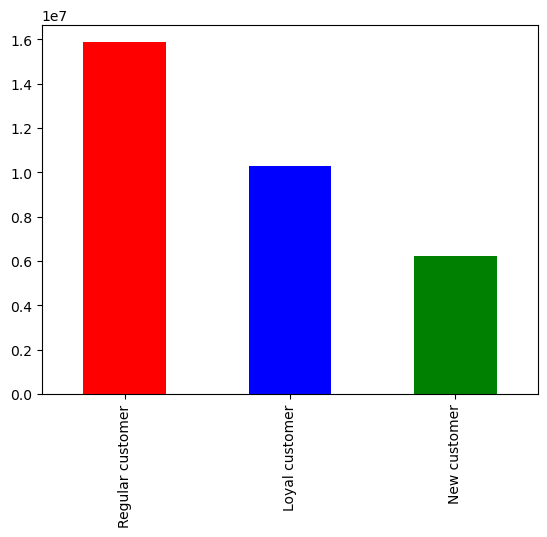

In [21]:
bar = df_fin['loyalty_flag'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

In [22]:
#export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','bar_4.9_Pt2 Task.png'))

#5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [25]:
np.random.seed(4)
dev = np.random.rand(len(df_fin)) <= 0.7

In [26]:
big = df_fin[dev]
small = df_fin[~dev]

In [29]:
df_1 = small[['order_hour_of_day','prices']]

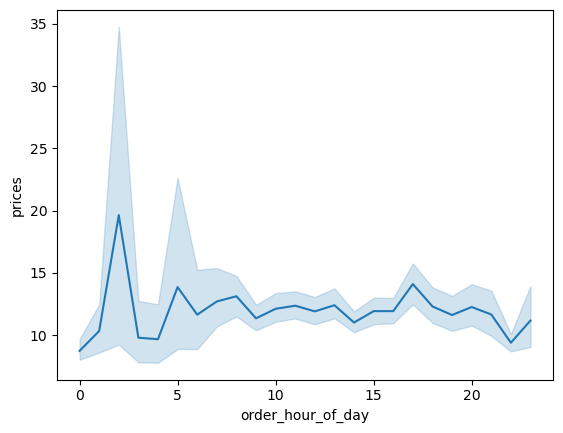

In [30]:
line_1 = sns.lineplot(data = df_1, x = 'order_hour_of_day',y = 'prices')

In [33]:
#export line chart 1
line_1.figure.savefig(os.path.join(path, '04 Analysis','linechart1_4.9_Pt2 Task.png'))

#6 Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [31]:
df_2 = small[['Dependents','Age']]

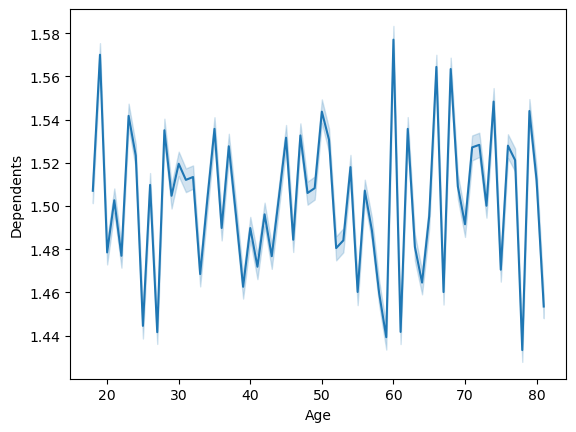

In [35]:
line_2 = sns.lineplot(data = df_2, x = 'Age',y = 'Dependents')

This line chart shows the ages od the customers on the X axis and the dependents on the Y axis (but it doesn't go from 0-3, so I don't think this is a full representation) of dependents  per customer age.

In [36]:
#export line chart 2
line_2.figure.savefig(os.path.join(path, '04 Analysis','linechart2_4.9_Pt2 Task.png'))

#7 You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [39]:
small_samp = small[['Age','Income']]

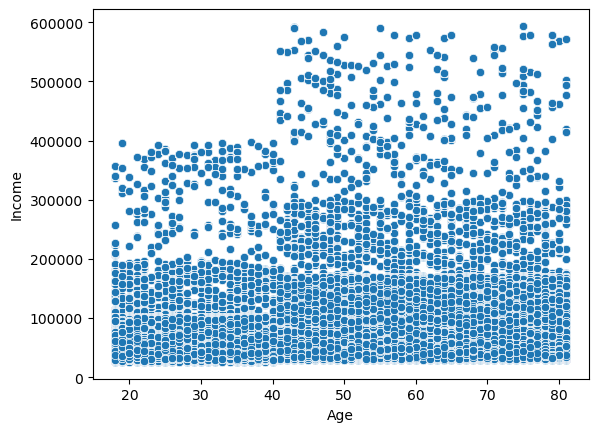

In [41]:
scat = sns.scatterplot(x = 'Age', y = 'Income',data = small_samp)

This one I tried with and without the small sample and the result is very hard to read both ways due to how many plots are on the chart. Also there aren't many incomes with more than $150K for the family, is it makes this chart seem unrealistic. 

In [47]:
#export scat plot
scat.figure.savefig(os.path.join(path, '04 Analysis','scat_4.9_Pt2 Task.png'))